In [81]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanicc/titanic.txt


# EX 1

In [82]:
df = pd.read_csv('https://raw.githubusercontent.com/plenoi/Clinic/master/ultima_all_clean.csv', sep=',', header = 0)

In [83]:
df = df.set_index('hn')
df

,age,parity,hiv,menopaus,disease,surgery,conization,OPDsize,appearance,stage,...,nodeyiel,RHlvsi,depth,size,utmet,vgmargin,vgmet,pelvicme,pmmet,adnmet
hn,,,,,,,,,,,,,,,,,,,,,
2631840,52,3,0.0,0.0,1,1,0.0,5.0,4.0,5.0,...,21.0,0.0,3.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0
2633481,32,2,0.0,0.0,0,1,0.0,5.0,1.0,5.0,...,11.0,0.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,2.0
2634477,52,2,0.0,0.0,0,0,0.0,5.0,NaN,5.0,...,35.0,6.0,3.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
2633633,38,2,0.0,0.0,0,0,0.0,2.0,1.0,4.0,...,20.0,16.0,3.0,3.8,0.0,0.0,0.0,0.0,0.0,2.0
2630496,55,3,0.0,1.0,0,0,1.0,0.0,5.0,4.0,...,17.0,9.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3169688,47,2,0.0,0.0,0,0,1.0,0.0,5.0,4.0,...,42.0,5.0,2.0,1.1,0.0,0.0,0.0,0.0,0.0,2.0
3167041,39,1,0.0,0.0,0,0,1.0,0.0,5.0,2.0,...,20.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,2.0
2623351,46,2,0.0,0.0,0,0,1.0,0.0,5.0,1.0,...,13.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [84]:
df_missing = df

In [85]:
df_missing = df_missing.dropna(0,'any')

In [86]:
df_missing.isnull().any()

age           False
parity        False
hiv           False
menopaus      False
disease       False
surgery       False
conization    False
OPDsize       False
appearance    False
stage         False
pchemo        False
Wardsize      False
finalhisto    False
nodeyiel      False
RHlvsi        False
depth         False
size          False
utmet         False
vgmargin      False
vgmet         False
pelvicme      False
pmmet         False
adnmet        False
dtype: bool

In [87]:
df_missing.columns

Index(['age', 'parity', 'hiv', 'menopaus', 'disease', 'surgery', 'conization',
       'OPDsize', 'appearance', 'stage', 'pchemo', 'Wardsize', 'finalhisto',
       'nodeyiel', 'RHlvsi', 'depth', 'size', 'utmet', 'vgmargin', 'vgmet',
       'pelvicme', 'pmmet', 'adnmet'],
      dtype='object')

In [88]:
df_missing = df_missing.drop('hiv',1)
df_missing = df_missing.drop('size',1)
df_missing = df_missing.drop('utmet',1)
df_missing = df_missing.drop('vgmet',1)
df_missing = df_missing.drop('surgery',1)
df_missing = df_missing.drop('pchemo',1)
df_missing.columns


Index(['age', 'parity', 'menopaus', 'disease', 'conization', 'OPDsize',
       'appearance', 'stage', 'Wardsize', 'finalhisto', 'nodeyiel', 'RHlvsi',
       'depth', 'vgmargin', 'pelvicme', 'pmmet', 'adnmet'],
      dtype='object')

In [89]:
df_change_age = df_missing

In [90]:
df_change_age['age'].unique()

array([52, 32, 38, 55, 67, 47, 37, 44, 48, 39, 27, 51, 42, 40, 64, 36, 56,
       33, 46, 49, 54, 58, 31, 60, 34, 45, 41, 63, 50, 43, 30, 53, 61, 62,
       35, 69, 59, 28, 25, 57, 26, 72, 22, 68, 29, 24, 65, 71, 66, 73, 70,
       76])

In [91]:
df_change_age.loc[df_change_age['age'] <= 20,'age']  = 'Young'
df_change_age.loc[df_change_age['age'] > 20,'age'] = 'Old'
df_change_age

,age,parity,menopaus,disease,conization,OPDsize,appearance,stage,Wardsize,finalhisto,nodeyiel,RHlvsi,depth,vgmargin,pelvicme,pmmet,adnmet
hn,,,,,,,,,,,,,,,,,
2631840,Old,3,0.0,1,0.0,5.0,4.0,5.0,5.0,3.0,21.0,0.0,3.0,0.0,0.0,0.0,0.0
2633481,Old,2,0.0,0,0.0,5.0,1.0,5.0,5.0,1.0,11.0,0.0,3.0,0.0,1.0,0.0,2.0
2633633,Old,2,0.0,0,0.0,2.0,1.0,4.0,3.0,3.0,20.0,16.0,3.0,0.0,0.0,0.0,2.0
2630496,Old,3,1.0,0,1.0,0.0,5.0,4.0,0.0,1.0,17.0,9.0,3.0,0.0,1.0,0.0,0.0
2450167,Old,5,1.0,1,0.0,3.0,2.0,4.0,3.0,1.0,34.0,38.0,3.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3812011,Old,2,1.0,1,1.0,0.0,5.0,4.0,1.0,1.0,18.0,0.0,3.0,2.0,0.0,0.0,0.0
3813471,Old,2,0.0,1,0.0,3.0,2.0,4.0,3.0,1.0,33.0,999.0,3.0,2.0,1.0,1.0,0.0
3812935,Old,1,1.0,1,1.0,0.0,5.0,4.0,0.0,1.0,17.0,0.0,3.0,0.0,0.0,1.0,0.0


In [92]:
df_change_age['pmmet'].unique()

array([0., 1.])

In [93]:
df_pm0 = df_change_age.loc[df_change_age['pmmet'] == 0. ]
df_pm1 = df_change_age.loc[df_change_age['pmmet'] == 1. ]

In [94]:
df_pm0

,age,parity,menopaus,disease,conization,OPDsize,appearance,stage,Wardsize,finalhisto,nodeyiel,RHlvsi,depth,vgmargin,pelvicme,pmmet,adnmet
hn,,,,,,,,,,,,,,,,,
2631840,Old,3,0.0,1,0.0,5.0,4.0,5.0,5.0,3.0,21.0,0.0,3.0,0.0,0.0,0.0,0.0
2633481,Old,2,0.0,0,0.0,5.0,1.0,5.0,5.0,1.0,11.0,0.0,3.0,0.0,1.0,0.0,2.0
2633633,Old,2,0.0,0,0.0,2.0,1.0,4.0,3.0,3.0,20.0,16.0,3.0,0.0,0.0,0.0,2.0
2630496,Old,3,1.0,0,1.0,0.0,5.0,4.0,0.0,1.0,17.0,9.0,3.0,0.0,1.0,0.0,0.0
2450167,Old,5,1.0,1,0.0,3.0,2.0,4.0,3.0,1.0,34.0,38.0,3.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3810768,Old,1,0.0,1,0.0,3.0,1.0,4.0,3.0,1.0,15.0,0.0,3.0,0.0,0.0,0.0,0.0
3812586,Old,2,1.0,1,0.0,3.0,1.0,4.0,3.0,1.0,32.0,7.0,3.0,0.0,0.0,0.0,0.0
3807672,Old,7,0.0,1,0.0,4.0,1.0,4.0,4.0,2.0,17.0,1.0,3.0,0.0,0.0,0.0,0.0


In [95]:
df_pm1

,age,parity,menopaus,disease,conization,OPDsize,appearance,stage,Wardsize,finalhisto,nodeyiel,RHlvsi,depth,vgmargin,pelvicme,pmmet,adnmet
hn,,,,,,,,,,,,,,,,,
2635600,Old,2,0.0,0,0.0,3.0,2.0,4.0,3.0,1.0,18.0,10.0,3.0,0.0,1.0,1.0,2.0
2634755,Old,2,0.0,0,0.0,4.0,4.0,4.0,4.0,1.0,20.0,999.0,3.0,0.0,1.0,1.0,0.0
2647653,Old,1,0.0,1,0.0,6.0,1.0,5.0,6.0,1.0,14.0,5.0,3.0,0.0,1.0,1.0,0.0
2648037,Old,2,0.0,0,0.0,2.0,1.0,6.0,2.0,1.0,28.0,1.0,3.0,0.0,0.0,1.0,0.0
2657353,Old,5,1.0,0,1.0,0.0,5.0,4.0,0.0,1.0,26.0,10.0,3.0,2.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2484711,Old,0,0.0,0,0.0,4.0,1.0,4.0,3.0,2.0,10.0,999.0,3.0,0.0,1.0,1.0,0.0
3810771,Old,1,0.0,0,1.0,3.0,2.0,4.0,3.0,1.0,23.0,10.0,3.0,0.0,0.0,1.0,0.0
3813471,Old,2,0.0,1,0.0,3.0,2.0,4.0,3.0,1.0,33.0,999.0,3.0,2.0,1.0,1.0,0.0


In [96]:
pm0_10 = df_pm0.sample(10)
pm1_10 = df_pm1.sample(10)

In [97]:
pm0_10

,age,parity,menopaus,disease,conization,OPDsize,appearance,stage,Wardsize,finalhisto,nodeyiel,RHlvsi,depth,vgmargin,pelvicme,pmmet,adnmet
hn,,,,,,,,,,,,,,,,,
3228154,Old,1,1.0,0,1.0,0.0,5.0,4.0,0.0,4.0,24.0,0.0,2.0,0.0,0.0,0.0,0.0
3251281,Old,2,0.0,0,0.0,2.0,2.0,4.0,1.5,1.0,23.0,0.0,1.0,0.0,0.0,0.0,0.0
3626291,Old,3,1.0,1,1.0,0.0,5.0,4.0,0.0,1.0,40.0,0.0,2.0,0.0,0.0,0.0,0.0
3320947,Old,1,0.0,0,0.0,4.0,1.0,5.0,4.0,3.0,28.0,999.0,3.0,0.0,0.0,0.0,0.0
3200182,Old,2,1.0,1,0.0,0.0,5.0,1.0,0.0,2.0,42.0,0.0,1.0,0.0,0.0,0.0,0.0
2872456,Old,1,0.0,1,0.0,3.0,1.0,6.0,4.0,1.0,27.0,999.0,3.0,0.0,0.0,0.0,0.0
3169643,Old,2,0.0,0,0.0,4.0,1.0,4.0,4.0,3.0,30.0,2.0,3.0,0.0,0.0,0.0,0.0
3288303,Old,2,1.0,1,1.0,0.0,5.0,1.0,0.0,1.0,19.0,0.0,1.0,0.0,0.0,0.0,0.0
2740239,Old,2,0.0,0,0.0,1.5,2.0,4.0,1.0,1.0,20.0,0.0,2.0,1.0,0.0,0.0,2.0


In [98]:
pm1_10

,age,parity,menopaus,disease,conization,OPDsize,appearance,stage,Wardsize,finalhisto,nodeyiel,RHlvsi,depth,vgmargin,pelvicme,pmmet,adnmet
hn,,,,,,,,,,,,,,,,,
3468217,Old,0,0.0,0,0.0,4.0,1.0,4.0,4.0,2.0,36.0,999.0,2.0,0.0,1.0,1.0,0.0
3270407,Old,1,0.0,1,0.0,3.0,2.0,4.0,5.0,1.0,37.0,999.0,3.0,1.0,1.0,1.0,2.0
1985171,Old,2,1.0,1,0.0,6.0,4.0,5.0,6.0,1.0,42.0,2.0,3.0,0.0,0.0,1.0,0.0
3855674,Old,2,0.0,0,0.0,3.0,4.0,4.0,2.0,1.0,21.0,999.0,3.0,2.0,1.0,1.0,0.0
3313062,Old,2,0.0,0,0.0,5.0,1.0,5.0,4.0,1.0,20.0,0.0,3.0,0.0,0.0,1.0,0.0
3761351,Old,2,1.0,1,0.0,3.0,2.0,4.0,5.0,1.0,29.0,0.0,3.0,0.0,0.0,1.0,0.0
2422578,Old,0,0.0,0,0.0,4.0,1.0,4.0,3.0,1.0,21.0,999.0,3.0,0.0,1.0,1.0,1.0
2933586,Old,1,0.0,0,1.0,0.0,5.0,4.0,0.0,1.0,23.0,19.0,3.0,0.0,0.0,1.0,0.0
3125670,Old,2,0.0,0,0.0,6.0,1.0,5.0,6.0,2.0,21.0,4.0,3.0,0.0,0.0,1.0,0.0


# EX 2

In [111]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

<AxesSubplot:xlabel='age'>

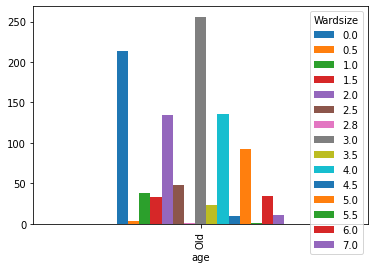

In [103]:
pd.crosstab(df_missing['age'],df_missing['Wardsize']).plot(kind='bar')

<AxesSubplot:xlabel='age'>

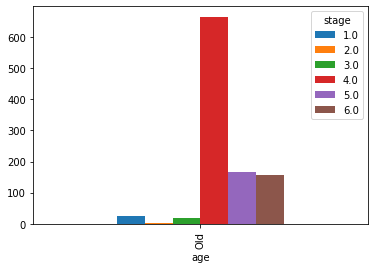

In [104]:
pd.crosstab(df_missing['age'],df_missing['stage']).plot(kind='bar')

<AxesSubplot:xlabel='depth'>

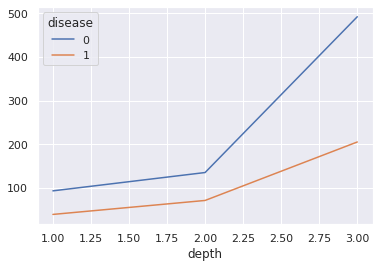

In [107]:
pd.crosstab(df_missing['depth'],df_missing['disease']).plot(kind='line')

<AxesSubplot:xlabel='finalhisto'>

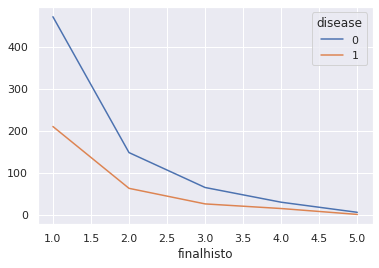

In [108]:
pd.crosstab(df_missing['finalhisto'],df_missing['disease']).plot(kind='line')

<AxesSubplot:ylabel='Frequency'>

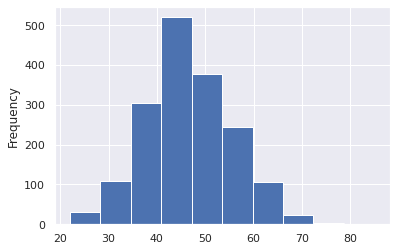

In [117]:
df['age'].plot(kind = 'hist')